Winrate

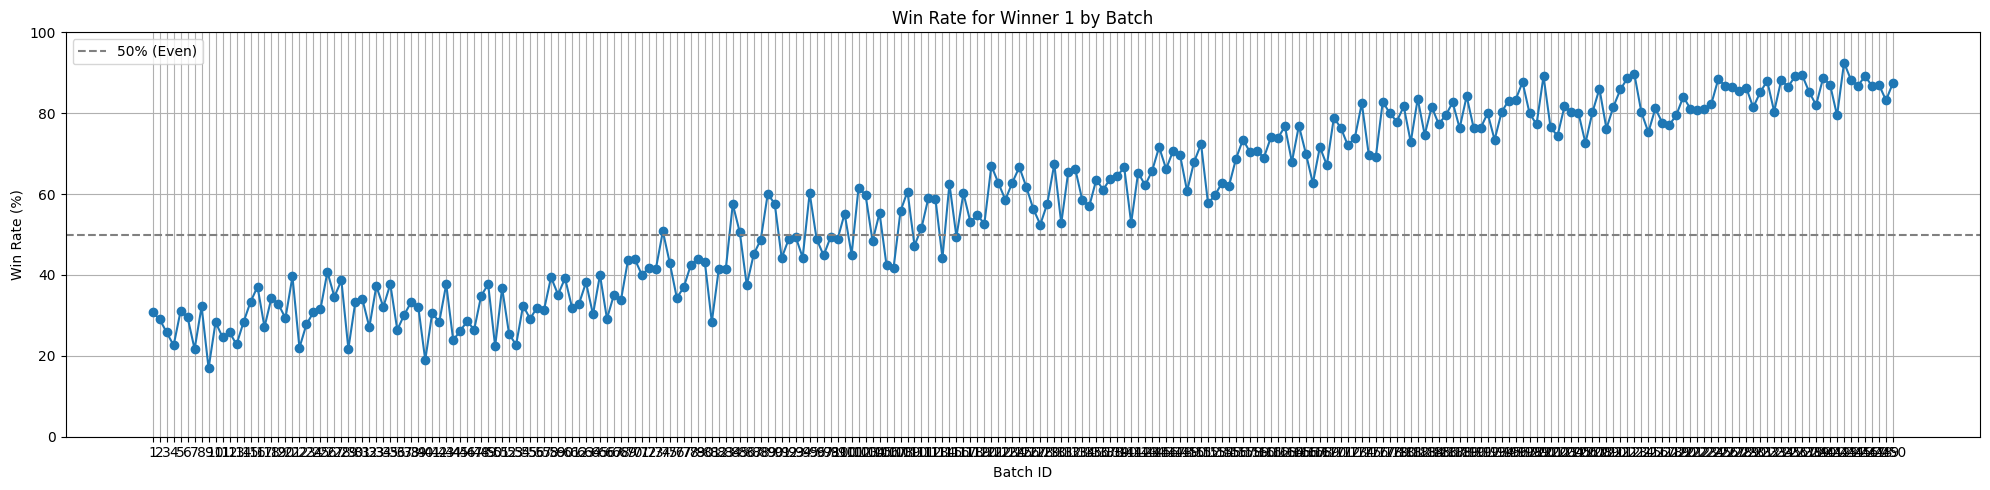

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Path to your episodes log database
DB_PATH = "training_episodes_log.db"

# Connect and load data into DataFrame
with sqlite3.connect(DB_PATH) as conn:
    df = pd.read_sql_query("SELECT batch_id, winner FROM episodes WHERE winner IN (1, 2)", conn)

# Filter data to only include batch_id <= 20.0
#df = df[df['batch_id'] <= 20.0]

# Group by batch and count winners
counts = df.groupby(['batch_id', 'winner']).size().unstack(fill_value=0)

# Compute win rate for winner 1 as percentage
total_games = counts[1] + counts[2]
counts['winrate_1_percent'] = (counts[1] / total_games) * 100

# Plot
plt.figure(figsize=(20, 5))
plt.plot(counts.index, counts['winrate_1_percent'], marker='o', linestyle='-')
plt.title("Win Rate for Winner 1 by Batch")
plt.xlabel("Batch ID")
plt.ylabel("Win Rate (%)")
#plt.xlim(None, 20.5)
plt.ylim(0, 100)  # Set y-axis from 0 to 100%
plt.xticks(range(int(counts.index.min()), int(counts.index.max()) + 1))  # Set x-axis ticks to integers
plt.grid(True)
plt.axhline(50, color='gray', linestyle='--', label='50% (Even)')
plt.legend()
plt.tight_layout()
plt.show()


Fit to n degree poly curve, n=3

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

n = 3  # Change this to your desired degree

# Path to your episodes log database
DB_PATH = "training_episodes_log.db"

# Connect and load data into DataFrame
with sqlite3.connect(DB_PATH) as conn:
    df = pd.read_sql_query("SELECT batch_id, winner FROM episodes WHERE winner IN (1, 2)", conn)

# Group by batch and count winners
counts = df.groupby(['batch_id', 'winner']).size().unstack(fill_value=0)

# Compute win rate for winner 1 as percentage
total_games = counts[1] + counts[2]
counts['winrate_1_percent'] = (counts[1] / total_games) * 100

# Fit an n-degree polynomial to the winrate curve
x = counts.index.values
y = counts['winrate_1_percent'].values

# Fit polynomial and generate predicted curve
coeffs = np.polyfit(x, y, deg=n)
poly = np.poly1d(coeffs)
x_fit = np.linspace(x.min(), x.max(), 500)  # Smooth curve
y_fit = poly(x_fit)

# Plot
plt.figure(figsize=(100, 10))
plt.plot(x, y, marker='o', linestyle='-', label='Actual Win Rate')
plt.plot(x_fit, y_fit, color='red', linestyle='--', linewidth=2, label=f'{n}-Degree Polynomial Fit')
plt.title("Win Rate for Winner 1 by Batch")
plt.xlabel("Batch ID")
plt.ylabel("Win Rate (%)")
plt.ylim(0, 100)
plt.xticks(range(int(x.min()), int(x.max()) + 1))
plt.axhline(50, color='gray', linestyle='--', label='50% (Even)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


DatabaseError: Execution failed on sql 'SELECT batch_id, winner FROM episodes WHERE winner IN (1, 2)': no such table: episodes

Number of Wins

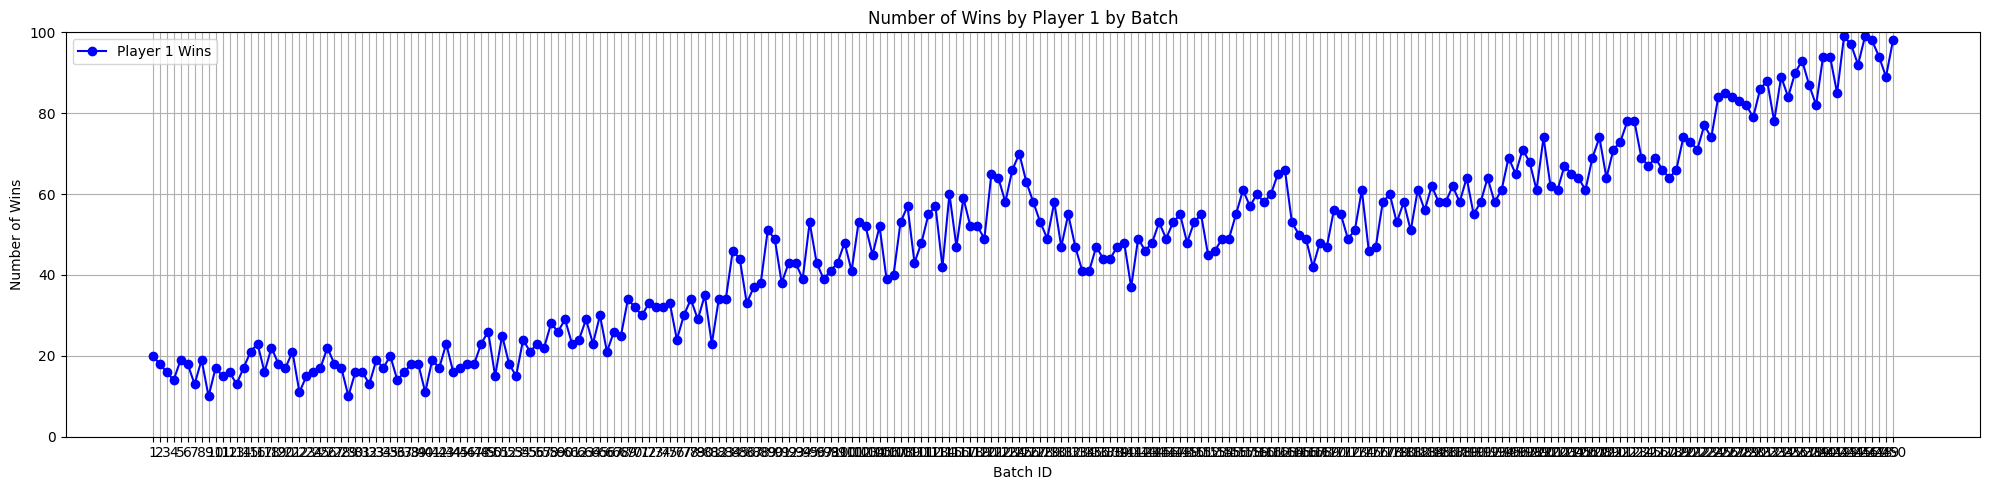

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Path to your episodes log database
DB_PATH = "current_episode_log.db"

# Connect and load data into DataFrame
with sqlite3.connect(DB_PATH) as conn:
    df = pd.read_sql_query("SELECT batch_id, winner FROM episodes WHERE winner IN (1, 2)", conn)

# Group by batch_id and winner, count occurrences
counts = df.groupby(['batch_id', 'winner']).size().unstack(fill_value=0)

# Make sure column 1 (player 1 wins) exists even if no wins for some batches
if 1 not in counts.columns:
    counts[1] = 0

# Plot number of wins by player 1
plt.figure(figsize=(20, 5))
plt.ylim(0, 100)  # Set y-axis from 0 to 100 wins
plt.plot(counts.index, counts[1], marker='o', linestyle='-', color='blue', label='Player 1 Wins')
plt.title("Number of Wins by Player 1 by Batch")
plt.xlabel("Batch ID")
plt.ylabel("Number of Wins")
plt.xticks(range(int(counts.index.min()), int(counts.index.max()) + 1))  # Integer x-axis
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
